This notebook generates UMAP plots for the organoid dataset

In [1]:
list_of_packages <- c("ggplot2", "dplyr", "tidyr", "circlize")
for (package in list_of_packages) {
    suppressPackageStartupMessages(
        suppressWarnings(
            library(
                package,
                character.only = TRUE,
                quietly = TRUE,
                warn.conflicts = FALSE
            )
        )
    )
}
#

In [2]:
# Get the current working directory and find Git root
find_git_root <- function() {
    # Get current working directory
    cwd <- getwd()
    
    # Check if current directory has .git
    if (dir.exists(file.path(cwd, ".git"))) {
        return(cwd)
    }
    
    # If not, search parent directories
    current_path <- cwd
    while (dirname(current_path) != current_path) {  # While not at root
        parent_path <- dirname(current_path)
        if (dir.exists(file.path(parent_path, ".git"))) {
            return(parent_path)
        }
        current_path <- parent_path
    }
    
    # If no Git root found, stop with error
    stop("No Git root directory found.")
}

# Find the Git root directory
root_dir <- find_git_root()
cat("Git root directory:", root_dir, "\n")

Git root directory: /home/lippincm/Documents/GFF_3D_organoid_profiling_pipeline 


In [3]:
figures_path <- file.path(root_dir,"5.EDA/figures/")
if (!dir.exists(figures_path)) {
  dir.create(figures_path, recursive = TRUE)
}

## Plotting UMAPs for organoid dataset

- Organoid features
- Single cell features
- Single cell features with parent organoid labels


In [4]:
# output paths
organoid_features_path <- file.path(figures_path, "umap_organoid_features.png")
single_cell_features_path <- file.path(figures_path, "umap_single_cell_features.png")
single_cell_features_annotated_path <- file.path(figures_path, "umap_single_cell_w_parent_organoid_labels.png")

In [5]:
umap_results <- arrow::read_parquet(file.path(root_dir,"5.EDA/results/organoid_fs_umap.parquet"))
head(umap_results)

patient,object_id,unit,dose,treatment,image_set,Well,single_cell_count,Target,Class,Therapeutic Categories,UMAP1,UMAP2
<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
NF0014,40,uM,10,Mirdametinib,G8-1,G8,8,MEK1/2 inhibitor,Small Molecule,Kinase Inhibitor,-1.2527590,6.106524
NF0014,24,uM,1,Fimepinostat,D5-1,D5,5,PI3K and HDAC inhibitor,Small Molecule,Investigational,-0.2551139,2.851046
NF0014,85,uM,1,Mirdametinib,F8-1,F8,9,MEK1/2 inhibitor,Small Molecule,Kinase Inhibitor,2.8916833,2.332242
NF0014,18,nM,10,Staurosporine,G11-1,G11,1,Apoptosis induction,Small Molecule,Experimental,-1.3627120,6.070857
NF0014,24,uM,1,Binimetinib,G7-1,G7,7,MEK1/2 inhibitor,Small Molecule,Kinase Inhibitor,-1.5257740,6.772458
NF0014,30,uM,1,Copanlisib,E3-2,E3,9,PI3K inhibitor,Small Molecule,Kinase Inhibitor,-0.7871740,5.977594


### Color mapping for MOAs

In [6]:
print(length(unique(umap_results$Target)))
unique(umap_results$Target)

[1] 15


[1] "MEK1/2 inhibitor"                   "PI3K and HDAC inhibitor"           
 [3] "Apoptosis induction"                "PI3K inhibitor"                    
 [5] "receptor tyrosine kinase inhibitor" "HSP90 inhibitor"                   
 [7] "Control"                            "mTOR inhibitor"                    
 [9] "tyrosine kinase inhibitor"          "IGF-1R inhibitor"                  
[11] "Na+/K+ pump inhibitor"              "histamine H1 receptor antagonist"  
[13] "DNA binding"                        "BRD4 inhibitor"                    
[15] "HDAC inhibitor"

In [7]:
# set custom colors for each MOA
custom_MOA_palette <- c(
    'Control' = "#5a5c5d",
    'MEK1/2 inhibitor' = "#882E8B",
    

    'HDAC inhibitor' = "#1E6B61",
    'PI3K and HDAC inhibitor' = "#2E6B8B",
    'PI3K inhibitor'="#0092E0",

    'receptor tyrosine kinase inhibitor'="#576A20",
    'tyrosine kinase inhibitor'="#646722",

    
    'mTOR inhibtor'="#ACE089",
    'IGF-1R inhibitor' = "#ACE040",

    'HSP90 inhibitor'="#33206A",
    'Apoptosis induction'="#272267",
    'Na+/K+ pump inhibitor' = "#A16C28",
    'histamine H1 receptor antagonist' = "#3A8F00",
    'DNA binding' = "#174F17",
    'BRD4 inhibitor' = "#ff0000"
    
)
    

### Organoid features

In [8]:
head(umap_results)

patient,object_id,unit,dose,treatment,image_set,Well,single_cell_count,Target,Class,Therapeutic Categories,UMAP1,UMAP2
<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
NF0014,40,uM,10,Mirdametinib,G8-1,G8,8,MEK1/2 inhibitor,Small Molecule,Kinase Inhibitor,-1.2527590,6.106524
NF0014,24,uM,1,Fimepinostat,D5-1,D5,5,PI3K and HDAC inhibitor,Small Molecule,Investigational,-0.2551139,2.851046
NF0014,85,uM,1,Mirdametinib,F8-1,F8,9,MEK1/2 inhibitor,Small Molecule,Kinase Inhibitor,2.8916833,2.332242
NF0014,18,nM,10,Staurosporine,G11-1,G11,1,Apoptosis induction,Small Molecule,Experimental,-1.3627120,6.070857
NF0014,24,uM,1,Binimetinib,G7-1,G7,7,MEK1/2 inhibitor,Small Molecule,Kinase Inhibitor,-1.5257740,6.772458
NF0014,30,uM,1,Copanlisib,E3-2,E3,9,PI3K inhibitor,Small Molecule,Kinase Inhibitor,-0.7871740,5.977594


Warning message:
“Removed 461 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 461 rows containing missing values or values outside the scale range
(`geom_point()`).”


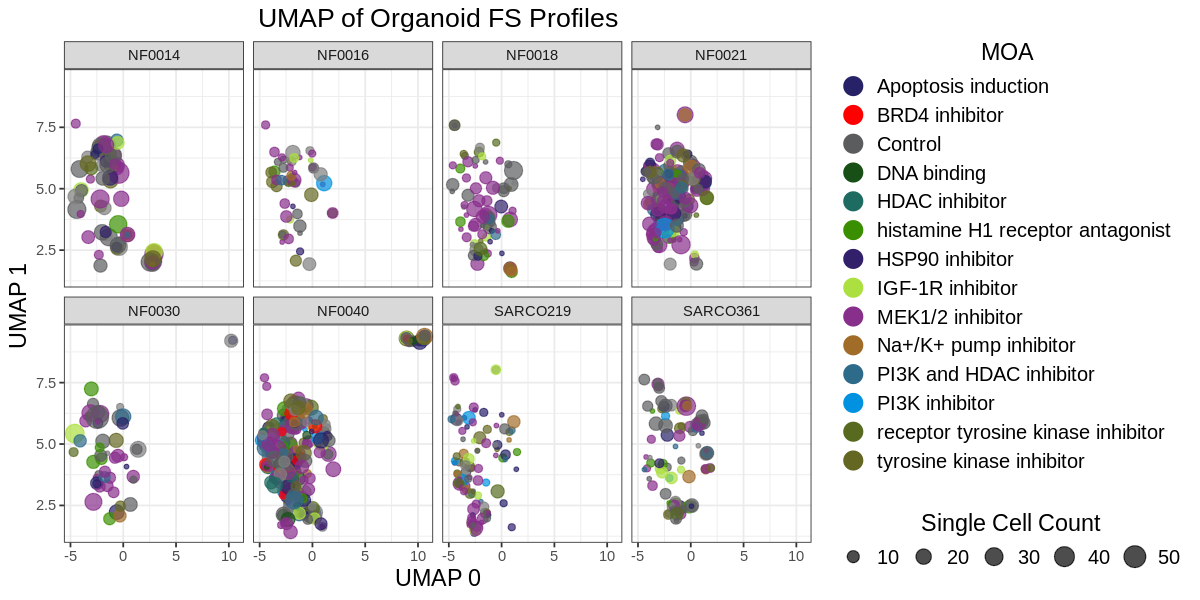

In [9]:
width <- 10
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_organoid_plot <- (
    ggplot(umap_results, aes(x = UMAP1, y = UMAP2, color = Target, size = single_cell_count))
    + geom_point(alpha = 0.7)
    + scale_color_manual(values = custom_MOA_palette)
    + labs(title = "UMAP of Organoid FS Profiles", x = "UMAP 0", y = "UMAP 1")
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 16),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        legend.title = element_text(size = 14, hjust = 0.5),
        legend.text = element_text(size = 12)
    )
    + guides(
        size = guide_legend(
            title = "Single Cell Count",
            text = element_text(size = 16, hjust = 0.5, position = "top"),
            # make two columns for the legend
            nrow = 1,
            # title position to top

            # move to bottom
            # position = "bottom"
            
            ),
        color = guide_legend(
            title = "MOA",
            text = element_text(size = 16, hjust = 0.5),
            override.aes = list(alpha = 1,size = 5),
            # nrow = 2,
            ncol = 1
            # position = "bottom"
        )
    )
    + facet_wrap(~patient, nrow = 2)
)
ggsave(umap_organoid_plot, file = organoid_features_path, width = width, height = height, dpi = 300)
umap_organoid_plot

In [10]:
patients <- unique(umap_results$patient)
hex_codes <- c(
"#86C436",
"#BFD468",
"#36C4BB",
"#68D4B4",
"#7336C4",
"#7E68D4",
"#C4363F",
"#D46888"
)
patient_color_palette <- setNames(hex_codes[1:length(patients)], patients)

Warning message:
“Removed 461 rows containing missing values or values outside the scale range
(`geom_point()`).”


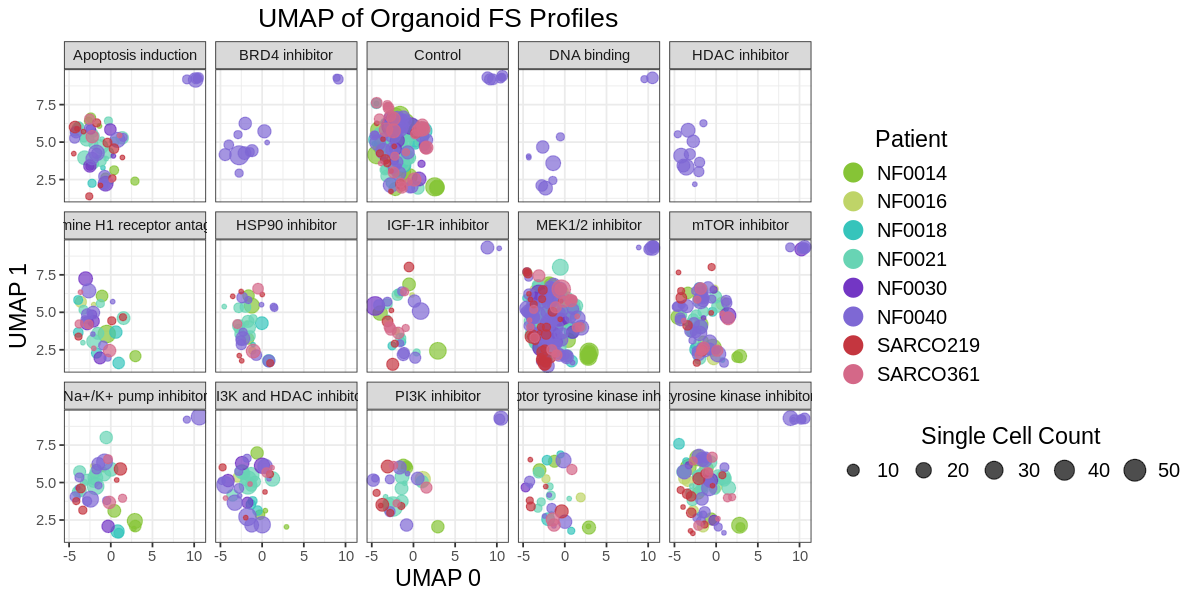

In [11]:
width <- 10
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_organoid_plot <- (
    ggplot(umap_results, aes(x = UMAP1, y = UMAP2, color = patient, size = single_cell_count))
    + geom_point(alpha = 0.7)
    + scale_color_manual(values = patient_color_palette)
    + labs(title = "UMAP of Organoid FS Profiles", x = "UMAP 0", y = "UMAP 1")
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 16),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        legend.title = element_text(size = 14, hjust = 0.5),
        legend.text = element_text(size = 12)
    )
    + guides(
        size = guide_legend(
            title = "Single Cell Count",
            text = element_text(size = 16, hjust = 0.5, position = "top"),
            # make two columns for the legend
            nrow = 1,
            # title position to top

            # move to bottom
            # position = "bottom"
            
            ),
        color = guide_legend(
            title = "Patient",
            text = element_text(size = 16, hjust = 0.5),
            override.aes = list(alpha = 1,size = 5),
            # nrow = 2,
            ncol = 1
            # position = "bottom"
        )
    )
    + facet_wrap(~Target, nrow = 3)
)
# ggsave(umap_organoid_plot, file = organoid_features_path, width = width, height = height, dpi = 300)
umap_organoid_plot

In [12]:
# get just the DMSO treatments
umap_results_dmsos <- umap_results %>% filter(Target == "Control")

Warning message:
“Removed 82 rows containing missing values or values outside the scale range
(`geom_point()`).”


Warning message:
“Removed 82 rows containing missing values or values outside the scale range
(`geom_point()`).”


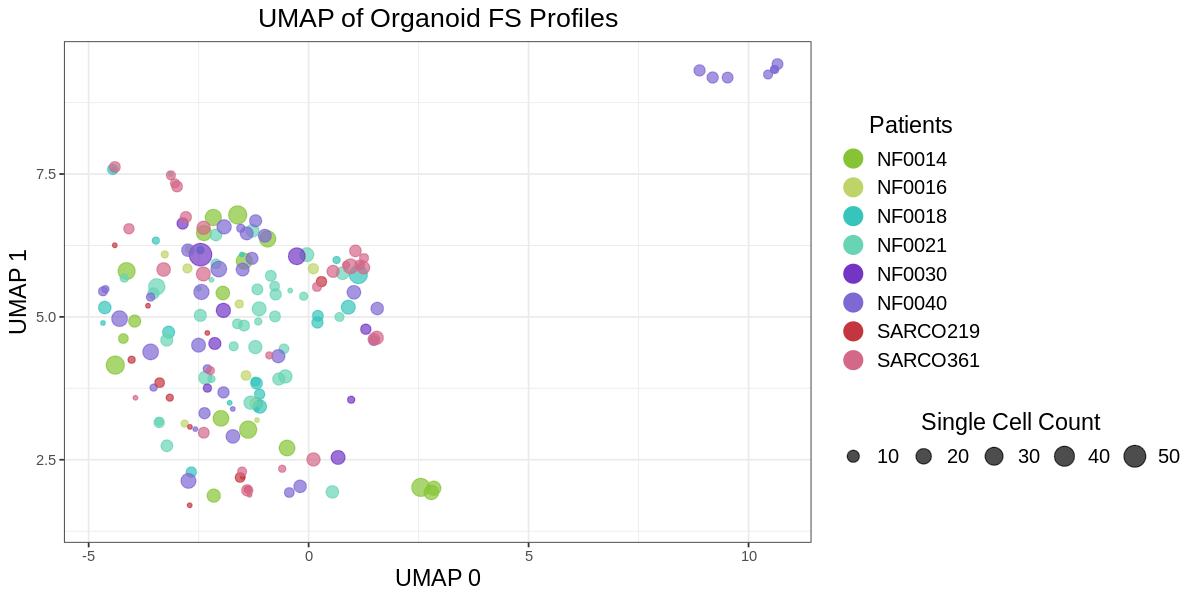

In [13]:
width <- 10
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_organoid_plot <- (
    ggplot(umap_results_dmsos, aes(x = UMAP1, y = UMAP2, color = patient, size = single_cell_count))
    + geom_point(alpha = 0.7)
    + scale_color_manual(values = patient_color_palette)
    + labs(title = "UMAP of Organoid FS Profiles", x = "UMAP 0", y = "UMAP 1")
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 16),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        legend.title = element_text(size = 14, hjust = 0.5),
        legend.text = element_text(size = 12)
    )
    + guides(
        size = guide_legend(
            title = "Single Cell Count",
            text = element_text(size = 16, hjust = 0.5, position = "top"),
            # make two columns for the legend
            nrow = 1,
            # title position to top

            # move to bottom
            # position = "bottom"
            
            ),
        color = guide_legend(
            title = "Patients",
            text = element_text(size = 16, hjust = 0.5),
            override.aes = list(alpha = 1,size = 5),
            # nrow = 2,
            ncol = 1
            # position = "bottom"
        )
    )
)
ggsave(umap_organoid_plot, file = organoid_features_path, width = width, height = height, dpi = 300)
umap_organoid_plot

## Single patient UMAPs

In [14]:
# NF0014 patient
patient <- "NF0014"
patient_umap_file_path <- file.path(root_dir, paste0("5.EDA/results/patient_results/",patient,"_organoid_consensus_umap.parquet"))
umap_results_patient <- arrow::read_parquet(patient_umap_file_path)
head(umap_results_patient)

treatment,single_cell_count,UMAP1,UMAP2
<chr>,<dbl>,<dbl>,<dbl>
Binimetinib,10.0,6.213578,10.51101
Cabozantinib,11.0,5.070370,10.58545
Copanlisib,10.0,6.800248,11.59443
DMSO,21.0,7.785293,10.25200
Digoxin,9.0,4.659511,12.20296
Everolimus,10.5,6.701687,10.78850


In [ ]:
width <- 10
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_organoid_plot <- (
    ggplot(umap_results_dmsos, aes(x = UMAP1, y = UMAP2, color = treatment, size = single_cell_count))
    + geom_point(alpha = 0.7)
    + scale_color_manual(values = patient_color_palette)
    + labs(title = "UMAP of Organoid FS Profiles", x = "UMAP 0", y = "UMAP 1")
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 16),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        legend.title = element_text(size = 14, hjust = 0.5),
        legend.text = element_text(size = 12)
    )
    + guides(
        size = guide_legend(
            title = "Single Cell Count",
            text = element_text(size = 16, hjust = 0.5, position = "top"),
            # make two columns for the legend
            nrow = 1,
            # title position to top

            # move to bottom
            # position = "bottom"
            
            ),
        color = guide_legend(
            title = "Patients",
            text = element_text(size = 16, hjust = 0.5),
            override.aes = list(alpha = 1,size = 5),
            # nrow = 2,
            ncol = 1
            # position = "bottom"
        )
    )
)
ggsave(umap_organoid_plot, file = organoid_features_path, width = width, height = height, dpi = 300)
umap_organoid_plot

### Single cell features

In [15]:
# umap_sc_results <- arrow::read_parquet('../results/NF0014/3.sc_fs_profiles_umap.parquet')
head(umap_sc_results)
umap_sc_plot <- (
    ggplot(umap_sc_results, aes(x = UMAP1, y = UMAP2, color = Target))
    + geom_point(size = 3, alpha = 0.9)
    + scale_color_manual(values = custom_MOA_palette)
    + labs(title = "UMAP of Single-Cell FS Profiles", x = "UMAP 0", y = "UMAP 1")
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 16),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        legend.title = element_text(size = 14, hjust = 0.5),
        legend.text = element_text(size = 12)
    )
    + guides(
        color = guide_legend(
            title = "MOA",
            text = element_text(size = 16, hjust = 0.5),
            override.aes = list(alpha = 1,size = 5)
        )
    )
)
# ggsave(umap_sc_plot, file = single_cell_features_path, width = width, height = height, dpi = 300)

umap_sc_plot


ERROR: Error in head(umap_sc_results): object 'umap_sc_results' not found


### Single cell features with parent organoid labels

In [ ]:
umap_sc_results$unique_parent_organoid <- paste(
    umap_sc_results$image_set, 
    umap_sc_results$parent_organoid, 
    sep = "_"
)
# give a numerical label to each unique parent organoid
umap_sc_results$parent_organoid_label <- as.numeric(factor(umap_sc_results$unique_parent_organoid))

In [ ]:
# custom color palette - continuous
custom_palette <- colorRampPalette(c("blue", "green", "yellow"))
custom_colors <- custom_palette(length(unique(umap_sc_results$parent_organoid_label)))
# make the scale continuous
custom_colors <- circlize::colorRamp2(seq(0, 1, length.out = length(unique(umap_sc_results$parent_organoid_label))), custom_colors)

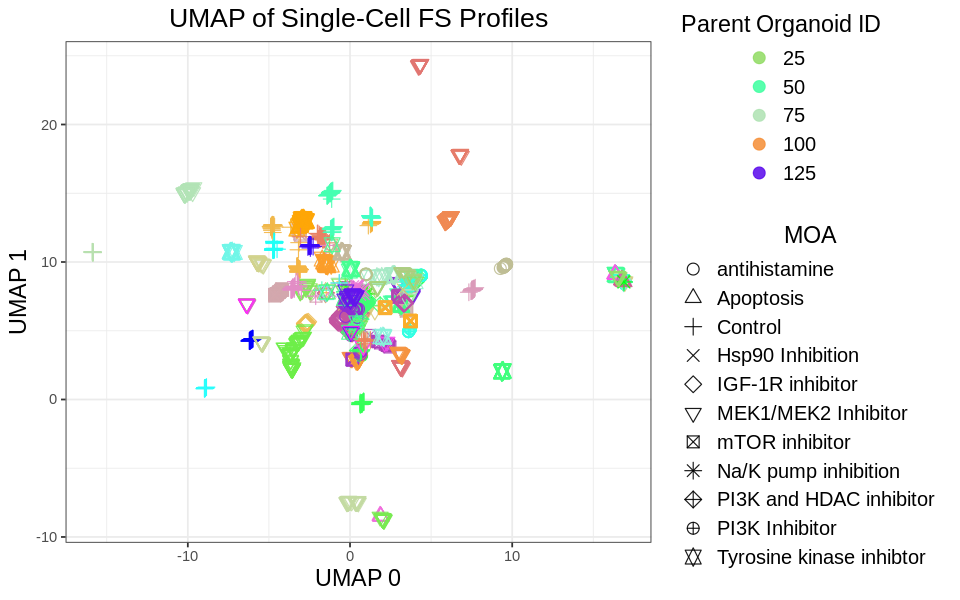

In [ ]:
umap_sc_plot <- (
    ggplot(umap_sc_results, aes(x = UMAP1, y = UMAP2, color = parent_organoid_label, shape = MOA))
    + geom_point(size = 3, alpha = 0.9)
    # add  custom color scale
    + scale_color_gradientn(colors = c("magenta", "green", "cyan", "orange", "blue"))
    + scale_shape_manual(values = c(
        1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
        ))  # different shapes for each MOA
    + labs(title = "UMAP of Single-Cell FS Profiles", x = "UMAP 0", y = "UMAP 1")
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 16),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        legend.title = element_text(size = 14, hjust = 0.5),
        legend.text = element_text(size = 12)
    )
    + guides(
        shape = guide_legend(
            title = "MOA",
            text = element_text(size = 16, hjust = 0.5)
            ),
        color = guide_legend(
            title = "Parent Organoid ID",
            text = element_text(size = 16, hjust = 0.5)
        )
    )
)
ggsave(umap_sc_plot, file = single_cell_features_annotated_path, width = width, height = height, dpi = 300)

umap_sc_plot
